### Esercizio 4 lezione 9 del 22 ottobre 2020  



### <span style="color:red"> Il dataframe </span>
Il dataset si riferisce ai matrimoni celebrati a Milano per anno dell'evento, dal 2003 in poi.
<p>In particolare questo dataframe è disponibile sul sito del comune di Milano, i dati raccolti al suo interno sono stati collezionati a partire dal primo gennaio del 2003 fino al 31 dicembre 2019 e sono stati aggiornati annualmente. </p>

Cliccare qui andare al sito degli [Open data del comune di Milano](https://dati.comune.milano.it/).


### <span style="color:red"> Le variabili </span>
I matrimoni sono classificati secondo variabili relative all'evento (luogo del matrimonio, tipo di rito), e variabili relative ai due sposi (residenza, stato civile precedente il matrimonio, cittadinanza, età).
<p> La variabile 'numerosità' si riferisce a quante coppie si sono sposate con le stesse caratteristiche, quindi è il numero di matrimoni che hanno le stesse identiche caratteristiche.</p>

In [4]:
#importo le librerie
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

#importo il file csv
data =pd.read_csv(r"C:\Users\Laura\Desktop\PythonDataScienceHandbook-master\notebooks\data\matrimoni_unioni_civili.csv")

#cancello la colonna '_id' in quanto jupyter notebook al momento dell'importazione del file csv ne crea una identica
data.drop('_id', inplace=True, axis=1)

#visualizzo il dataframe
data


,Anno_evento,Luogo_matrimonio,Rito,Residenza_marito,Residenza_moglie,Stato_civile_marito,Stato_civile_moglie,Cittadinanza_marito,Cittadinanza_moglie,Eta_marito,Eta_moglie,Numerosità
0,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,23.0,1
1,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,24.0,1
2,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,29.0,5
3,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,30.0,1
4,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,31.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
43532,2019,Milano,Geova,Milano,Italia,Divorziato o già coniugato,Vedova,Moldova,Romania,38.0,37.0,1
43533,2019,Milano,Geova,Milano,Milano,Celibe,Nubile,Italia,Italia,25.0,28.0,1
43534,2019,Milano,Geova,Milano,Milano,Celibe,Nubile,Italia,Italia,28.0,31.0,1
43535,2019,Milano,Geova,Milano,Milano,Celibe,Nubile,Italia,Italia,30.0,30.0,1


### <span style="color:red"> L'analisi dei dati </span>
<p> Creiamo due mask di valori booleani rispetto alle condizioni se il rito è cattolico o civile, dopo di chè andremo a confrontare con delle misure statistiche quali sono la media,il massimo e il minimo del'età con cui le  persone si sono sposate, dopodichè andremo ad analizzare in particolare l'età media sia in generale che suddivisa per rito e anno</p>


In [5]:
mask_cattolico= data['Rito'] == 'Cattolico'

In [6]:
mask_civile= data['Rito'] == 'Civile'

>Andiamo a calcolare il numero di persone e lo inseriamo nella variabile 'persone', in quanto la variabile numero_matrimoni è espressa per numero di coppie ( quindi numero_matrimoni = 1 significa una coppia che si sposa e quindi due persone ).
> <p>Dopodichè inseriemo la variabile nel dataframe per semplificare i calcoli successivi</p>

In [7]:
#rinomino la colonna Numerosità in numero_matrimoni per evitare di fare confusione
data =data.rename(columns={'Numerosità':'numero_matrimoni' })

persone=data['numero_matrimoni']*2
data['Numero_Persone']= persone
data.head()

,Anno_evento,Luogo_matrimonio,Rito,Residenza_marito,Residenza_moglie,Stato_civile_marito,Stato_civile_moglie,Cittadinanza_marito,Cittadinanza_moglie,Eta_marito,Eta_moglie,numero_matrimoni,Numero_Persone
0,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,23.0,1,2
1,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,24.0,1,2
2,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,29.0,5,10
3,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,30.0,1,2
4,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,31.0,6,12


> Raggruppiamo il dataframe per anno e per rito andando a sommare il numero di persone raggruppate in quella specifica categoria.


In [8]:
data_grouped=data.groupby(['Anno_evento','Rito']).sum()
data_grouped.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)
data_grouped

Numero_Persone
Anno_evento Rito                      
2003        Cattolico             4196
            Civile                4324
            Geova                    8
2004        Altri Riti               4
            Cattolico             3676
...                                ...
2019        Altri Riti              20
            Cattolico             1270
            Civile                4594
            Evangelico               6
            Geova                   28

[92 rows x 1 columns]


> Calcoliamo il massimo,il minimo e la media dell'età degli uomini e delle donne che si sono sposate negli anni presi in considerazione ovvero dal  2003 fino al 2019

In [9]:
#operazione per avere come media un risultato intero, senza decimali
media_etamoglie= int(round(data['Eta_moglie'].mean()))
media_etamarito= int(round(data['Eta_marito'].mean()))

print("\nL'età più alta in cui una donna che si è sposata fra il 2003 e il 2019 è pari a",np.max(data['Eta_moglie']),"anni" " \nmentre l'età più alta per gli uomini è pari ad anni",np.max(data['Eta_marito'],axis=0) )
print("\nL'età più bassa in cui una donna che si è sposata fra il 2003 e il 2019 è pari a",np.min(data['Eta_moglie']), " \nmentre l'età più bassa per gli uomini è pari a",np.min(data['Eta_marito'], axis=0) )
print("\nL'età media delle donne che si sono sposate fra il 2003 e il 2019 è pari ad anni",media_etamoglie," \nmentre l'età media degli uomini che si sono sposati fra il 2003 e il 2019 è pari ad anni",media_etamarito )


L'età più alta in cui una donna che si è sposata fra il 2003 e il 2019 è pari a 91.0 anni 
mentre l'età più alta per gli uomini è pari ad anni 99.0

L'età più bassa in cui una donna che si è sposata fra il 2003 e il 2019 è pari a 16.0  
mentre l'età più bassa per gli uomini è pari a 18.0

L'età media delle donne che si sono sposate fra il 2003 e il 2019 è pari ad anni 37  
mentre l'età media degli uomini che si sono sposati fra il 2003 e il 2019 è pari ad anni 40


### <span style="color:red"> L'analisi dei valori mancanti</span>

<p>Analizziamo i valori n.a, ovvero i valori mancanti. Prima di tutti andiamo a vedere se sono presenti all'interno del dataframe generale </p>

In [10]:
#analizziamo le righe
data.isnull().any() #ci sono valori nulli in Cittadinanza_marito,in Eta_marito e in Eta_moglie

Anno_evento            False
Luogo_matrimonio       False
Rito                   False
Residenza_marito       False
Residenza_moglie       False
Stato_civile_marito    False
Stato_civile_moglie    False
Cittadinanza_marito     True
Cittadinanza_moglie    False
Eta_marito              True
Eta_moglie              True
numero_matrimoni       False
Numero_Persone         False
dtype: bool

In [11]:
#nella colonna cittadinanza marito l'unica riga con un valore mancante è la 42517esima 
data[data['Cittadinanza_marito'].isnull()]

,Anno_evento,Luogo_matrimonio,Rito,Residenza_marito,Residenza_moglie,Stato_civile_marito,Stato_civile_moglie,Cittadinanza_marito,Cittadinanza_moglie,Eta_marito,Eta_moglie,numero_matrimoni,Numero_Persone
42517,2019,Milano,Civile,Milano,Milano,Celibe,Nubile,NaN,Italia,29.0,28.0,1,2


In [12]:
data[data['Eta_marito'].isnull()] #nella colonna eta_marito ci sono 12 righe con valori mancanti

,Anno_evento,Luogo_matrimonio,Rito,Residenza_marito,Residenza_moglie,Stato_civile_marito,Stato_civile_moglie,Cittadinanza_marito,Cittadinanza_moglie,Eta_marito,Eta_moglie,numero_matrimoni,Numero_Persone
565,2003,Milano,Civile,Estero,Milano,Celibe,Nubile,Gambia,Italia,NaN,35.0,1,2
2273,2003,Milano,Civile,Milano,Milano,Vedovo,Vedova,Italia,Italia,NaN,69.0,1,2
2757,2004,Milano,Cattolico,Milano,Milano,Celibe,Nubile,Italia,Italia,NaN,28.0,1,2
5931,2005,Milano,Civile,Estero,Milano,Celibe,Nubile,Ecuador,Ecuador,NaN,25.0,1,2
8850,2006,Milano,Civile,Estero,Milano,Celibe,Nubile,Perù,Perù,NaN,24.0,1,2
9855,2006,Milano,Civile,Milano,Milano,Celibe,Nubile,Italia,Italia,NaN,34.0,1,2
9856,2006,Milano,Civile,Milano,Milano,Celibe,Nubile,Italia,Italia,NaN,45.0,1,2
9857,2006,Milano,Civile,Milano,Milano,Celibe,Nubile,Italia,Italia,NaN,53.0,1,2
12698,2007,Milano,Civile,Milano,Milano,Celibe,Nubile,Italia,Italia,NaN,35.0,1,2
15429,2008,Milano,Civile,Milano,Milano,Celibe,Divorziata o già coniugata,Senegal,Italia,NaN,37.0,1,2


In [13]:
#nella colonna eta_moglie ci sono 14 righe con valori mancanti
data[data['Eta_moglie'].isnull()]

,Anno_evento,Luogo_matrimonio,Rito,Residenza_marito,Residenza_moglie,Stato_civile_marito,Stato_civile_moglie,Cittadinanza_marito,Cittadinanza_moglie,Eta_marito,Eta_moglie,numero_matrimoni,Numero_Persone
230,2003,Milano,Cattolico,Milano,Milano,Celibe,Nubile,Italia,Italia,33.0,NaN,1,2
3837,2004,Milano,Civile,Milano,Estero,Celibe,Nubile,Italia,Ucraina,24.0,NaN,1,2
5007,2004,Milano,Civile,Milano,Milano,Vedovo,Divorziata o già coniugata,Italia,Italia,50.0,NaN,1,2
6552,2005,Milano,Civile,Milano,Estero,Celibe,Nubile,Italia,Giappone,30.0,NaN,1,2
7209,2005,Milano,Civile,Milano,Milano,Celibe,Nubile,Italia,Italia,30.0,NaN,1,2
8926,2006,Milano,Civile,Italia,Italia,Celibe,Divorziata o già coniugata,Italia,Italia,36.0,NaN,1,2
11612,2007,Milano,Civile,Estero,Milano,Celibe,Nubile,Marocco,Italia,26.0,NaN,1,2
11638,2007,Milano,Civile,Estero,Milano,Celibe,Nubile,Nigeria,Nigeria,32.0,NaN,1,2
11817,2007,Milano,Civile,Italia,Milano,Celibe,Nubile,Italia,Italia,29.0,NaN,1,2
12420,2007,Milano,Civile,Milano,Italia,Divorziato o già coniugato,Nubile,Italia,Italia,63.0,NaN,1,2


### <span style="color:red">Analisi sull'età delle persone che si sono sposate </span>

> Troviamo l'età media suddivisa per ogni rito senza distinzione di anno partendo da:
> 1. la media dell'età degli uomini e delle donne che si sono sposate diversificata per riti senza distinzione di anno
> 2. la media dell'età degli uomini e delle donne che si sono sposate diversificata per riti nei diversi anni


In [14]:
#media delle età delle persone che si sono sposate con i vari riti
eta_media=data.groupby('Rito').mean()
#trasformo in int per avere numeri interi
eta_media['Eta_marito']= eta_media['Eta_marito'].astype(int)
eta_media['Eta_moglie']= eta_media['Eta_moglie'].astype(int)
#calcolo la differenza di età fra marito e moglie
eta_media['Differenza_eta']= eta_media['Eta_marito']-eta_media['Eta_moglie']
eta_media.drop(['Anno_evento', 'numero_matrimoni','Numero_Persone'],inplace=True, axis=1)
eta_media

,Eta_marito,Eta_moglie,Differenza_eta
Rito,,,
Altri Riti,35,32,3
Cattolico,35,32,3
Civile,42,38,4
Evangelico,36,33,3
Geova,31,29,2
Israelita,36,34,2


> Da questa tabella deduciamo che mediamente le persone che si sposano prima sono coloro che professano la fede dei Testimonia di Geova.
Osserviamo poi che mediamente la differenza di età maggiore è quella fra persone sposate con rito civile

Andiamo a guardare la medià di età fra i diversi anni perchè ci interessa vedere se c'è stato un effettivo cambiamento negli anni di questo dato

In [15]:
#media dell'età delle persone che si sono sposate nei diversi anni
eta_media_anni=data.groupby(['Anno_evento','Rito']).mean()
#trasformo in int per avere numeri interi
eta_media_anni['Eta_marito']= eta_media_anni['Eta_marito'].astype(int)
eta_media_anni['Eta_moglie']= eta_media_anni['Eta_moglie'].astype(int)
#calcolo la differenza di età fra marito e moglie
eta_media_anni['Differenza_eta']= abs(eta_media_anni['Eta_marito']-eta_media_anni['Eta_moglie'])

eta_media_anni.drop(['numero_matrimoni','Numero_Persone'],inplace=True, axis=1)
eta_media_anni

Eta_marito  Eta_moglie  Differenza_eta
Anno_evento Rito                                              
2003        Cattolico           34          31               3
            Civile              39          35               4
            Geova               33          30               3
2004        Altri Riti          37          36               1
            Cattolico           34          31               3
...                            ...         ...             ...
2019        Altri Riti          35          34               1
            Cattolico           36          33               3
            Civile              44          40               4
            Evangelico          41          34               7
            Geova               28          28               0

[92 rows x 3 columns]

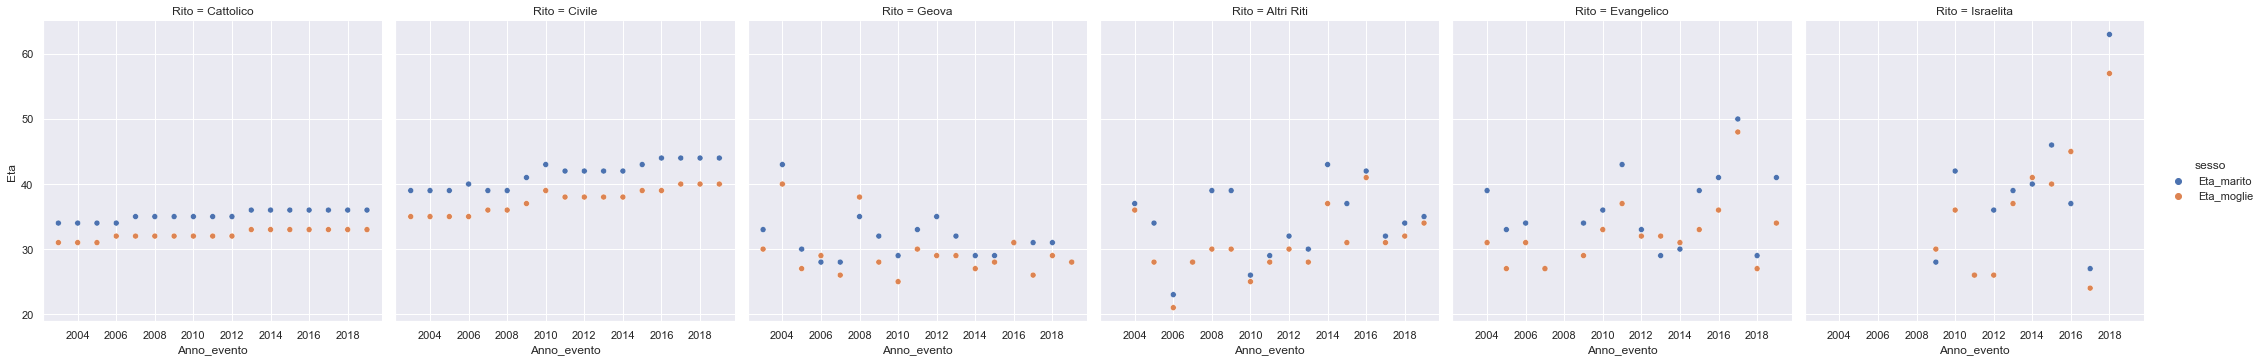

In [16]:
eta_media_anni = eta_media_anni.reset_index()
eta_melt= eta_media_anni.melt(id_vars=["Anno_evento","Rito","Differenza_eta"],
                              var_name='sesso',
                              value_name='Eta')
eta_melt.drop('Differenza_eta',inplace=True,axis=1)
eta_melt

#sappiamo che probabilmente i grafici sono troppo piccoli ma pensiamo che la tendenza dei grafici sia abbastanza interpretabile
g= seaborn.relplot(data= eta_melt, x='Anno_evento',y='Eta',hue='sesso',col='Rito')

#i puntini arancio sono l'età della moglie, quelli blu sono l'età del marito
#in ordine sono: il rito Cattolico, quello Civile, Geova, Altri Riti, Evangelico e Israelita

> Notiamo che mediamente l'età in cui una donna si sposa è più bassa rispetto all'uomo.

> In particolare possiamo vedere come nel rito cattolico e in quello civile l'età delle persone per ogni anno è abbastanza stabile (anche se nel civile negli ultimi anni si è alzata).

In [17]:
np.max(eta_media_anni['Differenza_eta'])
eta_media_anni.query('Differenza_eta == 10')

,Anno_evento,Rito,Eta_marito,Eta_moglie,Differenza_eta
50,2012,Israelita,36,26,10


> La differenza di età maggiore è stata registrata nel 2012, fra due persone sposate con rito Israelita, ed è pari a 10 anni

### <span style="color:red">Analisi della variazione del numero di persone sposate </span>


<p> Per poter riuscire a capire meglio l'andamento dei matrimoni nel corso degli anni abbiamo deciso di utilizzare dei grafici</p>

> Iniziamo a guardare l'andamento del numero delle persone che si sono sposate in generale negli anni

In [18]:
#raggruppo per anno e conto le persone sposate per ogni anno
data_grouped2=data.groupby(['Anno_evento']).sum()
data_grouped2.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)
data_grouped2

,Numero_Persone
Anno_evento,
2003,8528
2004,8200
2005,8096
2006,7690
2007,7918
2008,7760
2009,6722
2010,5780
2011,5818


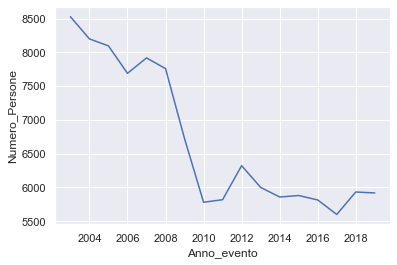

In [19]:
#creo il grafico 
seaborn.lineplot(data=data_grouped2, x='Anno_evento', y='Numero_Persone');

> <p> Si può notare che con il passare degli anni matrimoni di qualunque tipo sono calati.</p>
> <p> In particolare possiamo notare che a partire dal 2008 la 'curva' della quantità di persone che si sposano diminuisce</p>

In [20]:
variazione_2008_2009= round(100-((5780/6722)*100),2)
variazione_2009_2010= round(((5818/5780)*100)-100,2)
print ("Notiamo come fra il 2008 e il 2009 il numero di persone sposate siano diminuite del "
    ,variazione_2008_2009, "% \nmentre fra il 2009  il 2010 il numero di persone sale del", variazione_2009_2010,"%")


Notiamo come fra il 2008 e il 2009 il numero di persone sposate siano diminuite del  14.01 % 
mentre fra il 2009  il 2010 il numero di persone sale del 0.66 %


> A nostro parere la ragione per cui il numero di persone sposate diminuisca del 14% nel 2008 è stata la crisi economica. Infatti a causa della crisi econimica del 2008 ci furono delle difficoltà a trovare un’occupazione stabile, ad avere uno stipendio sufficiente e diventare autonomi dalle famiglie; questo portò i giovani a rimanere legati economicamente ai genitori e a sposarsi più avanti con l'età.


#### Prendiamo in considerazione i riti prevalenti e analizziamo grazie ai grafici l'andamento del numero delle persone sposate

In [21]:
#dataframe per le persone sposate con rito cattolico e con rito civile
cattolici = data.loc[(data['Rito'] == 'Cattolico')].groupby(['Anno_evento']).sum()
cattolici.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)

civili= data.loc[(data['Rito'] == 'Civile')].groupby(['Anno_evento']).sum()
civili.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)


#### -  Cattolici

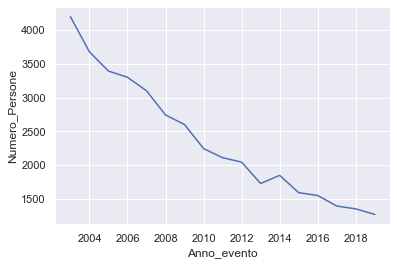

In [22]:
#creo il grafico per i cattolici
seaborn.lineplot(data=cattolici, x='Anno_evento', y='Numero_Persone');

> Anche prendendo in considerazione solo i matrimoni cattolici possiamo notare come con il passare degli anni siano diminuiti


In [23]:
variazione_2003_2019= round(((4196/1270)*100)-100,2)
print("Dal 2003 al 2019 c'è stata una diminuzione del numero di persone che si sposate del",variazione_2003_2019, "%")

Dal 2003 al 2019 c'è stata una diminuzione del numero di persone che si sposate del 230.39 %


#### - Civili

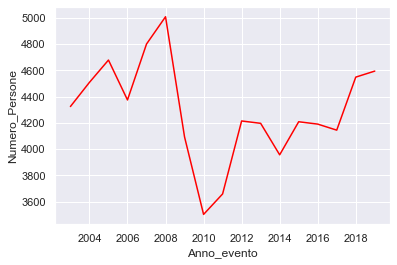

In [24]:
#creo il grafico per i civili
seaborn.lineplot(data=civili, x='Anno_evento', y='Numero_Persone',color='red');


> Analizzando il numero di persone sposate con rito civile possiamo notare che nel 2008 c'è stata una diminuzione del numero di persone sposate civilmente ma lentamente a partire dal 2010 hanno iniziato ad aumentare. Guardiamo in particolare la diminuizione avvenuta fra il 2008 e il 2010: 

Unendo i due grafici possiamo fare un'analisi più completa

In [25]:
#definisco il dataframe
df = data.loc[((data['Rito'] == 'Cattolico') | (data['Rito']=='Civile'))].groupby(['Anno_evento', 'Rito']).sum()
df.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)

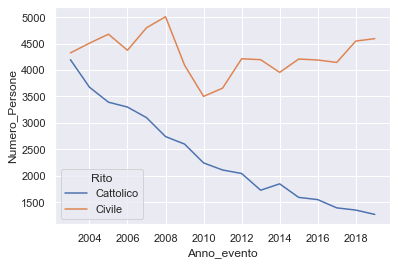

In [26]:
#creo il grafico
seaborn.lineplot(data=df ,x='Anno_evento', y='Numero_Persone',hue="Rito");

> Analizzando i matrimoni civili e cattolici simultaneamente notiamo che i matrimoni civili dall'inizio della raccolta dei dati ( ovvero dal 2003 ) sono in numero maggiore rispetto ai matrimoni effettuati con rito cattolico e non solo hanno avuto una diminuzione a partire dal 2008 minore rispetto ai matrimoni cattolici ma dal 2010, nonostante le persone che si sposano con rito cattolico continuano a diminuire , i matrimoni civili iniziano ad aumentare.

#### - Evangelico


In [27]:
evangelico = data.loc[(data['Rito'] == 'Evangelico')].groupby(['Anno_evento']).sum()
evangelico.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)
evangelico

,Numero_Persone
Anno_evento,
2004,6
2005,10
2006,4
2007,4
2009,2
2010,12
2011,12
2012,16
2013,6


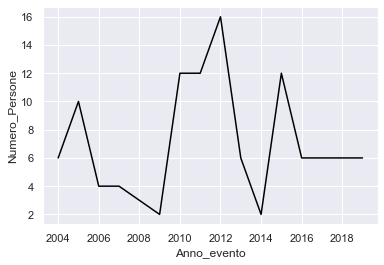

In [28]:
seaborn.lineplot(data=evangelico, x='Anno_evento', y='Numero_Persone', color='black');

> Nel comune di Milano fra il 2003 e il 2019 il numero di persone, rispetto agli altri riti, che si sono sposate con il rito evangelico è basso, infatti i numeri spazione fra un minimo di 6 ad un massimo di 16 persone l'anno

> Negli ultimi quattro anni osserviamo che il numero di persone che si sono sposate si è stabilizzato, ovvero dal 2016 fino al 2019 abbiamo un numero di persone sempre uguale di persone che si sono sposate co rito evangelico (in particolare sono sei persone ogni anno) 

#### - Geova

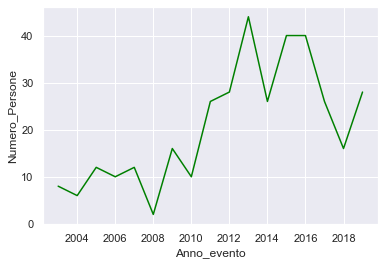

In [29]:
geova = data.loc[(data['Rito'] == 'Geova')].groupby(['Anno_evento']).sum()
geova.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)
seaborn.lineplot(data=geova, x='Anno_evento', y='Numero_Persone',color='green');

> Anche per questo rito abbiamo una quantità di persone minore rispetto ai due riti principali (quello cattolico e quello civile)


> Notiamo come il numero di persone sposate con il rito della fede dei Testimoni di Geova sono aumentati negli anni, in particolare dal 2009 sempre più persone si sono sposate con questo rito

#### - Israelita

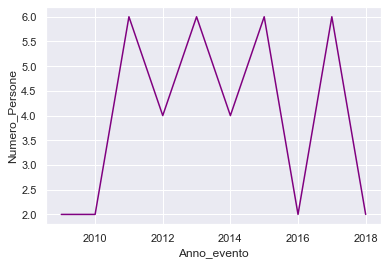

In [30]:
israelita = data.loc[(data['Rito'] == 'Israelita')].groupby(['Anno_evento']).sum()
israelita.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)
seaborn.lineplot(data=israelita, x='Anno_evento', y='Numero_Persone',color='purple');

> La quantità di persone che si sono sposate a Milano con il rito Isrealita è molto bassa, è il rito con la quantità minore di persone sposate, che variano fra le due persone l'anno e le sei persone l'anno.

#### - Altri Riti

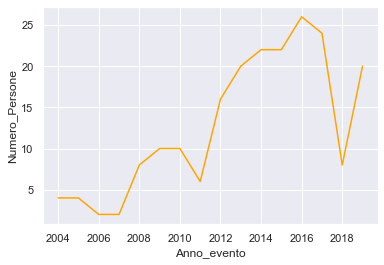

In [31]:
altri = data.loc[(data['Rito'] == 'Altri Riti')].groupby(['Anno_evento']).sum()
altri.drop(['Eta_moglie', 'numero_matrimoni','Eta_marito'],inplace=True, axis=1)
seaborn.lineplot(data=altri, x='Anno_evento', y='Numero_Persone',color='orange');


> Per tutti gli altri riti diversi da quelli presi in considerazione finora possiamo notare come il numero di persone sposate siano piccoli fino al 2008 (fra due persone l'anno e le otto persone l'anno); dal 2008 la quantità di persone inizia ad aumentare, anche se di poco, per poi stabilizzarsi per due anni (nel 2009 e nel 2010), dopodichè abbiamo che nel 2011 sono diminiuti di 4 unità per poi crescere ancora.

### <span style="color:red">Prendiamo in considerazione ora le nazionalità delle persone sposate</span>

In [32]:
citt_marito= data.groupby(['Cittadinanza_marito']).sum()
citt_marito.drop(['Anno_evento', 'Eta_marito','Eta_moglie','numero_matrimoni'],inplace=True, axis=1)

citt_moglie= data.groupby(['Cittadinanza_moglie']).sum()
citt_moglie.drop(['Anno_evento', 'Eta_marito','Eta_moglie','numero_matrimoni'],inplace=True, axis=1)


> Vogliamo sapere quante persone con cittadinanza non italiana si sono sposate a Milano

In [33]:
a = citt_marito.query("Cittadinanza_marito != 'Italia'")
b = citt_moglie.query("Cittadinanza_moglie != 'Italia'")
p1= a['Numero_Persone'].sum()
p2 = b['Numero_Persone'].sum()

print("Le persone con cittadinanza non Italiana sposate a Milano fra il 2003 e il 2019 sono pari a:", p1+p2)

Le persone con cittadinanza non Italiana sposate a Milano fra il 2003 e il 2019 sono pari a: 46664


> Ora analizziamo quante persone si sono sposate con la stessa cittadinanza

In [34]:
citt_it=data.query("Cittadinanza_marito== 'Italia' & Cittadinanza_moglie== 'Italia' ").shape[0]*2
print("In particolare le persone che si sono sposate entrambe con cittadinza italiana sono:",citt_it)

In particolare le persone che si sono sposate entrambe con cittadinza italiana sono: 51856


In [35]:
persone_stessa_cit= data.query('Cittadinanza_marito== Cittadinanza_moglie').shape[0]*2
print("La quantità di persone che si sono sposate con persone con la stessa cittadinanza sono:",persone_stessa_cit)

La quantità di persone che si sono sposate con persone con la stessa cittadinanza sono: 59578


In [36]:
citt_straniera=data.query("Cittadinanza_marito!= 'Italia' & Cittadinanza_moglie!= 'Italia' & Cittadinanza_marito==Cittadinanza_moglie ")
print("Le persone sposate con stessa cittadinanza, diversa da italiana, sono:",citt_straniera.shape[0]*2)


cs= citt_straniera.groupby(['Cittadinanza_marito','Cittadinanza_moglie']).sum()
cs.drop(['Anno_evento','Eta_marito','Eta_moglie','numero_matrimoni'],inplace=True,axis=1)
cs

Le persone sposate con stessa cittadinanza, diversa da italiana, sono: 7722


,,Numero_Persone
Cittadinanza_marito,Cittadinanza_moglie,
Albania,Albania,172
Algeria,Algeria,8
Angola,Angola,2
Argentina,Argentina,34
Australia,Australia,10
...,...,...
Uruguay,Uruguay,4
Venezuela,Venezuela,6
Zambia,Zambia,2


> In particolare vediamo nella tabella riportata sopra il numero di persone sposate con stessa cittadinanza suddivise per le varie nazionalità

Analizziamo ora le persone sposate fra di loro con nazionalità differenti

In [37]:
citt_diverse= data.query('Cittadinanza_marito!= Cittadinanza_moglie')
print("Il numero di persone sposate con nazionalità differenti sono",citt_diverse.shape[0]*2)

Il numero di persone sposate con nazionalità differenti sono 27496


In [38]:
citt_diverse_it= data.query("Cittadinanza_marito!= Cittadinanza_moglie & (Cittadinanza_marito== 'Italia' | Cittadinanza_moglie == 'Italia')")
print("Le persone con nazionalità italiana che hanno sposato uno straniero sono:",citt_diverse_it.shape[0]*2)

Le persone con nazionalità italiana che hanno sposato uno straniero sono: 24450


### <span style="color:red"> CHOROPLETH MAPS </span>

In [53]:
import numpy as np
import pandas as pd
import folium
import os
import json
import requests

In [67]:
with open(r'C:\Users\Laura\Desktop\PythonDataScienceHandbook-master\notebooks\data\world1.json') as f:
  world = json.load(f)
type(world)


dict

In [70]:
world

{'type': 'Topology',
 'objects': {'countries': {'type': 'GeometryCollection',
   'geometries': [{'type': 'MultiPolygon',
     'arcs': [[[0]], [[1]]],
     'id': '242',
     'properties': {'name': 'Fiji'}},
    {'type': 'Polygon',
     'arcs': [[2, 3, 4, 5, 6, 7, 8, 9, 10]],
     'id': '834',
     'properties': {'name': 'Tanzania'}},
    {'type': 'Polygon',
     'arcs': [[11, 12, 13, 14]],
     'id': '732',
     'properties': {'name': 'W. Sahara'}},
    {'type': 'MultiPolygon',
     'arcs': [[[15, 16, 17, 18]],
      [[19]],
      [[20]],
      [[21]],
      [[22]],
      [[23]],
      [[24]],
      [[25]],
      [[26]],
      [[27]],
      [[28]],
      [[29]],
      [[30]],
      [[31]],
      [[32]],
      [[33]],
      [[34]],
      [[35]],
      [[36]],
      [[37]],
      [[38]],
      [[39]],
      [[40]],
      [[41]],
      [[42]],
      [[43]],
      [[44]],
      [[45]],
      [[46]],
      [[47]]],
     'id': '124',
     'properties': {'name': 'Canada'}},
    {'type': 'Multi

In [72]:
world.keys()

dict_keys(['type', 'objects', 'arcs', 'bbox', 'transform'])

In [73]:
world.values()

dict_values(['Topology', {'countries': {'type': 'GeometryCollection', 'geometries': [{'type': 'MultiPolygon', 'arcs': [[[0]], [[1]]], 'id': '242', 'properties': {'name': 'Fiji'}}, {'type': 'Polygon', 'arcs': [[2, 3, 4, 5, 6, 7, 8, 9, 10]], 'id': '834', 'properties': {'name': 'Tanzania'}}, {'type': 'Polygon', 'arcs': [[11, 12, 13, 14]], 'id': '732', 'properties': {'name': 'W. Sahara'}}, {'type': 'MultiPolygon', 'arcs': [[[15, 16, 17, 18]], [[19]], [[20]], [[21]], [[22]], [[23]], [[24]], [[25]], [[26]], [[27]], [[28]], [[29]], [[30]], [[31]], [[32]], [[33]], [[34]], [[35]], [[36]], [[37]], [[38]], [[39]], [[40]], [[41]], [[42]], [[43]], [[44]], [[45]], [[46]], [[47]]], 'id': '124', 'properties': {'name': 'Canada'}}, {'type': 'MultiPolygon', 'arcs': [[[-19, 48, 49, 50]], [[51]], [[52]], [[53]], [[54]], [[55]], [[56]], [[57]], [[-17, 58]], [[59]]], 'id': '840', 'properties': {'name': 'United States of America'}}, {'type': 'Polygon', 'arcs': [[60, 61, 62, 63, 64, 65]], 'id': '398', 'propert

In [74]:
world.items()

dict_items([('type', 'Topology'), ('objects', {'countries': {'type': 'GeometryCollection', 'geometries': [{'type': 'MultiPolygon', 'arcs': [[[0]], [[1]]], 'id': '242', 'properties': {'name': 'Fiji'}}, {'type': 'Polygon', 'arcs': [[2, 3, 4, 5, 6, 7, 8, 9, 10]], 'id': '834', 'properties': {'name': 'Tanzania'}}, {'type': 'Polygon', 'arcs': [[11, 12, 13, 14]], 'id': '732', 'properties': {'name': 'W. Sahara'}}, {'type': 'MultiPolygon', 'arcs': [[[15, 16, 17, 18]], [[19]], [[20]], [[21]], [[22]], [[23]], [[24]], [[25]], [[26]], [[27]], [[28]], [[29]], [[30]], [[31]], [[32]], [[33]], [[34]], [[35]], [[36]], [[37]], [[38]], [[39]], [[40]], [[41]], [[42]], [[43]], [[44]], [[45]], [[46]], [[47]]], 'id': '124', 'properties': {'name': 'Canada'}}, {'type': 'MultiPolygon', 'arcs': [[[-19, 48, 49, 50]], [[51]], [[52]], [[53]], [[54]], [[55]], [[56]], [[57]], [[-17, 58]], [[59]]], 'id': '840', 'properties': {'name': 'United States of America'}}, {'type': 'Polygon', 'arcs': [[60, 61, 62, 63, 64, 65]], 

In [81]:
world['objects'].keys()
world['objects']['countries']
world['objects']['countries']['geometries']
world['objects']['countries']['geometries'][0].keys()
world['objects']['countries']['geometries'][0]['properties'].keys()


dict_keys(['name'])

In [90]:
citt_marito.reset_index()

,Cittadinanza_marito,Numero_Persone
0,Afghanistan,10
1,Albania,758
2,Algeria,96
3,Angola,6
4,Apolide,2
...,...,...
127,Vietnam,2
128,Yemen,4
129,Zambia,4
130,ex Jugoslavia,56


In [93]:
m2 = folium.Map(location=[41.706, 12.568], zoom_start=2)
folium.Choropleth(
    geo_data=world,
    data=citt_marito,
    columns=['Cittadinanza_marito','Numero_Persone'],
    topojson='objects.countries',
    key_on='feature.properties.name',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Uomini sposati a Milano'
).add_to(m2)

KeyError: "None of ['Cittadinanza_marito'] are in the columns"

### <span style="color:red"> Analisi su un possibile join </span> 
Un dataset che si potrebbe utilizzare per poter fare un join potrebbe essere un dataframe sulle statistiche delle confessioni religiose per nazione, in modo da vedere se c’è una relazione rito-nazionalità e confessione religiosa predominante nello stato. 

### <span style="color:red"> SINTESI DELL'ANALISI </span>

Grazie al database iniziale possiamo quindi dire che dal 2003 al 2019 il numero di persone che si sposa è per lo più diminuito, questo vale non solo riferito ai numeri delle persone sposate con rito cattolico ma anche per il rito civile. Per quanto riguarda tutti gli altri riti i dati sono molto variegati.

Un'altra informazione utile è che mediamente fra i due partner sposati con qualunque rito la donna ha un'età inferiore al momento del matrimonio rispetto all'uomo. Inoltre la media dell'età in cui le donne e gli uomini si sposano è rimasta abbastanza stabile negli anni per quanto riguarda il rito cattolico mentre il rito civile l'età media si alzata negli anni ( anche se non di molto). La differenza di età varia mediamente fra 1 e 4 anni di differenza (ci sono ovviamente anche alcune eccezzioni come per esempio il caso riportato sopra del 2012 dove la differenza di età fra i partner era di 10 anni)

Andando ad analizzare i dati sulle varie nazionalità dei partener abbiamo trovato che fra le 113836 persone sposate dal 2003 al 2019 circa il 45.5% sono persone italiane sposate fra di loro, circa il 24.2% sono straniere persone sposate fra di loro con nazionlità diverse di cui circa il 6.8% sono persone straniere con uguale cittadinanza mentre le persone con nazionalità italiana che hanno sposato uno straniero sono circa il 21.5%.